In [1]:
# To show the python version
import sys
assert sys.version_info >= (3,8)
print(sys.version_info)

# to show all the output from a code chunk
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# matplotlib for plotting
from matplotlib import pyplot as plt
%matplotlib inline

# Other external libraries like pandas and numpy
import pandas as pd
import numpy as np
np.random.seed(999)

# machine learning models
import sklearn
print(sklearn.__version__)

#import others
from sklearn.metrics import confusion_matrix
from sklearn import model_selection, datasets
from sklearn.tree import DecisionTreeClassifier
import joblib
import pickle
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

sys.version_info(major=3, minor=10, micro=10, releaselevel='final', serial=0)
1.1.1


In [2]:
from scipy.io import arff
# Load the arff file
header_info = arff.loadarff("Dataset/KDDTrain+.arff")
df = pd.DataFrame(header_info[0])
header_names = df.columns.values.tolist()
header_names.append('Difficulty')
kdd_train = pd.read_csv('Dataset/KDDTrain+.txt', delimiter = ',', header = None)

#Rename the headers
kdd_train.columns = header_names
#Drop the target variables
kdd_train_x = kdd_train.drop(['class', 'Difficulty'], axis = 1)
y = ['class']
kdd_train_y = kdd_train[y]

#Identify categorical features
num_cols = kdd_train_x._get_numeric_data().columns
cate_cols = list(set(kdd_train_x.columns) - set(num_cols))

from sklearn.preprocessing import StandardScaler
std = StandardScaler()

#One-Hot Encoding the categorical features
cate_features = pd.get_dummies(kdd_train_x[cate_cols], prefix = cate_cols)
one_hot_data = kdd_train_x.drop(cate_cols, axis = 1)
#Standard Scaler on numeric data
std_fit = std.fit(one_hot_data)
array_ss = std_fit.transform(one_hot_data)
one_hot_data_ss = pd.DataFrame(array_ss,columns=[num_cols])
one_hot_data_maha = pd.concat([one_hot_data_ss, cate_features], axis = 1)
one_hot_data_if = one_hot_data_maha
one_hot_data_if.head()
one_hot_data_maha.head()
data_array = np.array(one_hot_data_maha)
data_array.shape    # Make sure that the Numpy array dimension is consistent with the Pandas Dataframe
# function to calculate mahalanobis distance

,"(duration,)","(src_bytes,)","(dst_bytes,)","(land,)","(wrong_fragment,)","(urgent,)","(hot,)","(num_failed_logins,)","(logged_in,)","(num_compromised,)",...,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,0,1
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0


,"(duration,)","(src_bytes,)","(dst_bytes,)","(land,)","(wrong_fragment,)","(urgent,)","(hot,)","(num_failed_logins,)","(logged_in,)","(num_compromised,)",...,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,0,1
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0


(125973, 122)

In [3]:
label_map = {"normal": 0,
            "neptune": 1,
            "satan": 1,
            "ipsweep": 1,
            "portsweep": 1,
            "smurf": 1,
            "nmap": 1,
            "back": 1,
            "teardrop": 1,
            "warezclient": 1,
            "pod": 1,
            "guess_passwd": 1,
            "buffer_overflow": 1,
            "warezmaster": 1,
            "land": 1,
            "imap": 1,
            "rootkit": 1,
            "loadmodule": 1,
            "ftp_write": 1,
            "multihop": 1,
            "phf": 1,
            "perl": 1, 
            "spy": 1}
kdd_train_y["class_binary"] = kdd_train_y["class"].map(label_map)

C:\Users\khxia\AppData\Local\Temp\ipykernel_2984\3533821117.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kdd_train_y["class_binary"] = kdd_train_y["class"].map(label_map)


# PCA

## Hyperparameter Tunning for PCA

In [52]:
from sklearn.metrics import make_scorer, f1_score

def scorer_f(estimator, X):   #your own scorer
      return np.mean(estimator.score_samples(X))
    

In [53]:
parameters_pca = {'n_components' : np.linspace(0.1, 1, num = 22)}

In [54]:
from sklearn.decomposition import PCA
model_pca = PCA()

In [7]:
idx_rand = np.random.permutation(len(kdd_train_x))
num_sample = int(0.01*len(kdd_train_x))
one_hot_data_pca = one_hot_data_maha
one_hot_data_pca_sample = one_hot_data_pca.iloc[idx_rand[:num_sample]]
kdd_train_y_sample = kdd_train_y.iloc[idx_rand[:num_sample]]



In [8]:
f1sc = make_scorer(f1_score, average = 'micro')
randm_src = RandomizedSearchCV(estimator=model_pca, param_distributions = parameters_pca, cv = 3, scoring = f1sc, random_state = 0, return_train_score = True, n_jobs = -1)
model_src = randm_src.fit(one_hot_data_pca_sample, kdd_train_y_sample["class_binary"])

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 PCA(n_components=0.9571428571428572)

 The best score across ALL searched params:
 nan

 The best parameters across ALL searched params:
 {'n_components': 0.9571428571428572}


C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\decomposition\_pca.py", line 408, in fit
    self._fit(X)
  File "C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\decomposition\_pca.py", line 485, in _fit
    return self._fit_truncated(X, n_components, self._fit_svd_solver)
  File "C:\WINDOWS\s

In [9]:
#Keep best % of variance
model_pca = PCA(n_components=0.9571428571428572,whiten = True)

In [10]:
data_pca = model_pca.fit_transform(one_hot_data_maha)

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [11]:
print(data_pca.shape)

(125973, 25)


In [12]:
model_pca = PCA(n_components=25,whiten=True)

In [13]:
data_pca = model_pca.fit_transform(one_hot_data_maha)
print(data_pca.shape)

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


(125973, 25)


In [14]:
new_header =['Variable '+str(i) for i in range(model_pca.n_components)]

    
print(new_header)

['Variable 0', 'Variable 1', 'Variable 2', 'Variable 3', 'Variable 4', 'Variable 5', 'Variable 6', 'Variable 7', 'Variable 8', 'Variable 9', 'Variable 10', 'Variable 11', 'Variable 12', 'Variable 13', 'Variable 14', 'Variable 15', 'Variable 16', 'Variable 17', 'Variable 18', 'Variable 19', 'Variable 20', 'Variable 21', 'Variable 22', 'Variable 23', 'Variable 24']


In [15]:
data_pca = pd.DataFrame(data_pca,columns=new_header)

In [16]:
data_pca

,Variable 0,Variable 1,Variable 2,Variable 3,Variable 4,Variable 5,Variable 6,Variable 7,Variable 8,Variable 9,...,Variable 15,Variable 16,Variable 17,Variable 18,Variable 19,Variable 20,Variable 21,Variable 22,Variable 23,Variable 24
0,-0.271817,-0.031828,-0.007913,-0.057511,-0.242414,0.177059,-0.356125,0.408246,0.040124,0.127203,...,0.017673,-0.207699,-0.037677,-0.320516,0.282797,2.121937,-0.554458,-0.128769,-1.473139,-1.178282
1,0.172646,0.493701,0.004511,-0.797855,-0.794043,1.396155,-1.419620,1.811961,-0.912517,0.028640,...,0.001162,-0.341803,-0.086000,-0.390947,0.353699,2.470492,-0.970910,0.370601,1.229342,0.619450
2,1.415630,-0.666276,0.012028,-0.028398,-0.176458,-0.336946,0.050874,-0.047367,0.161117,0.009214,...,-0.013284,-0.080539,0.029774,0.017559,-0.007434,0.089605,0.323907,-0.208936,0.327632,-0.075673
3,-0.904705,-0.465462,-0.041510,0.310599,0.131188,-0.845985,0.027311,0.064317,0.051110,0.009947,...,0.013662,-0.103791,0.018487,-1.077262,0.095572,-1.068193,-0.187456,-0.311416,0.040898,-0.580725
4,-0.829569,-0.395406,-0.070325,0.588581,0.832244,-0.290600,-0.145860,0.193486,0.064853,-0.023984,...,-0.028782,-0.083731,0.048325,0.359113,-0.102098,-0.014897,0.542322,0.586904,0.417919,1.189537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,1.432927,-0.660116,0.000861,-0.084749,-0.018009,-0.098309,0.132684,-0.176189,0.182252,-0.003731,...,-0.018946,-0.062725,0.028225,-0.014553,-0.014393,-0.228299,0.052986,0.020982,0.233659,-0.010600
125969,-0.579312,-0.249285,-0.087692,0.143871,0.675707,0.262858,-0.190329,0.254527,0.112493,0.077055,...,-0.009618,-0.129349,0.007509,0.295708,0.013126,1.560214,1.871793,-0.068686,1.161842,-1.217924
125970,-0.158302,-0.281355,0.027748,0.556132,0.016131,-0.276331,-0.602391,0.657012,0.010436,0.078128,...,-0.026978,-0.180232,0.006479,0.230495,0.154844,1.554302,-0.749169,1.389903,-1.716422,0.592112
125971,1.437126,-0.668559,0.014501,-0.037322,-0.168116,-0.276399,0.092499,-0.121089,0.193097,0.007072,...,-0.019991,-0.087067,0.026621,0.024640,0.010868,0.134863,0.074791,-0.037038,0.033753,0.037857


In [17]:
data_array = np.array(data_pca)

# Mahalanobis With PCA

In [18]:
#Use new PCA data for Mahalanobis Distance
import scipy as sp
mu_vec = np.mean(data_array,axis = 0)
inv_cormat = sp.linalg.pinv(np.cov(data_array, rowvar=False))

# For loop to get the distance for all the variables
mahal_dist = []

for i in range(data_array.shape[0]):
    x_minus_mu = data_array[i,:] - mu_vec
    left_term = np.dot(x_minus_mu, inv_cormat)
    mahal = np.dot(left_term, x_minus_mu.T)
    mahal = np.sqrt(mahal)
    mahal_dist.append(mahal)

np.mean(one_hot_data_maha)

from scipy.stats import chi2
one_hot_data_maha['p-value'] = 1 - chi2.cdf(mahal_dist, df = 1) #pdf(x, degreeOfFreedom = Number of Variables)

#Calculate number of p-value less than 0.01
print(np.count_nonzero(one_hot_data_maha['p-value'] < 0.01))

C:\WINDOWS\system32\myenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(duration,)           2.549477e-17
(src_bytes,)         -4.512349e-19
(dst_bytes,)          7.614590e-19
(land,)              -4.794371e-18
(wrong_fragment,)     4.230328e-19
                          ...     
service_vmnet         4.897875e-03
service_whois         5.501179e-03
protocol_type_icmp    6.581569e-02
protocol_type_tcp     8.151667e-01
protocol_type_udp     1.190176e-01
Length: 122, dtype: float64

8003


In [19]:
pvalue = one_hot_data_maha['p-value']
bi_pvalue = pvalue

bi_pvalue = np.where(pvalue < 0.01, 1, bi_pvalue)
bi_pvalue = np.where(pvalue >= 0.01, 0, bi_pvalue)

from sklearn.metrics import accuracy_score

train_acc_maha = accuracy_score(kdd_train_y['class_binary'], bi_pvalue)
print("Training accuracy: {:.4f}".format(train_acc_maha))
cm_maha = confusion_matrix (kdd_train_y["class_binary"], bi_pvalue)
print(cm_maha)

Training accuracy: 0.5601
[[64950  2393]
 [53020  5610]]


In [20]:
kdd_train_y.at[5,'class_binary']

1

Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, 'Actual Values')

Text(33.0, 0.5, 'Predicted Values ')

[Text(0.5, 0, 'True'), Text(1.5, 0, 'False')]

[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

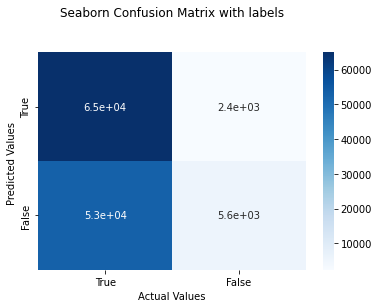

Precision =  0.9644654975275827
Recall =  0.5505637026362634


In [21]:
ax = sns.heatmap(cm_maha, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TP_maha = cm_maha[0][0]
FN_maha = cm_maha[1][0]
FP_maha = cm_maha[0][1]
TN_maha = cm_maha[1][1]

##Precision and Recall
Precision_maha = TP_maha/(TP_maha+FP_maha)
Recall_maha = TP_maha/(TP_maha+FN_maha)

print ("Precision = ",Precision_maha)
print ("Recall = ",Recall_maha)


# MCD

In [22]:
from sklearn.covariance import MinCovDet
from sklearn.datasets import make_gaussian_quantiles

rng = np.random.RandomState(42)

In [23]:
mcd_model = MinCovDet(random_state=42).fit(data_pca)

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-332.759692084672906 > -332.763933188341127). You may want to try with a higher value of support_fraction (current value: 0.500).
  warnings.warn(


In [24]:
np.mean(data_array,axis = 0)

array([-5.67498440e-17,  2.95843110e-17,  4.03752644e-17,  3.35103193e-16,
       -1.64534459e-16,  2.33059045e-16, -2.27692092e-16,  4.59230257e-16,
       -7.73590854e-17,  1.92287721e-16,  2.23520978e-16, -6.81321627e-16,
       -1.33083666e-15,  3.34444477e-16, -8.82611683e-16,  7.50206920e-16,
       -4.92388093e-17,  1.80799077e-16,  1.33453284e-16,  2.24509211e-17,
       -7.84107074e-16,  8.91884363e-16,  3.62221796e-18, -2.42578791e-15,
       -6.21133706e-16])

In [25]:
sp.linalg.pinv(np.cov(data_array, rowvar=False))

array([[ 1.00000000e+00, -2.33080447e-15, -3.89567548e-17,
         1.34918990e-16, -2.08932050e-17, -9.08365180e-17,
         6.59144514e-18, -2.27614170e-17,  7.31749185e-18,
         1.03928504e-17,  8.28685546e-18,  2.52503779e-18,
        -2.10319060e-18,  8.13749451e-18,  7.38074883e-18,
        -8.39523380e-18,  5.02163473e-18, -4.83475955e-18,
         5.64467110e-18, -2.95217035e-18, -3.32002302e-17,
         1.17597215e-17, -3.06320181e-18,  5.01140004e-18,
         1.17093835e-17],
       [-2.33744831e-15,  1.00000000e+00, -2.16647543e-17,
         3.92026951e-17, -2.30558038e-17,  1.95903508e-16,
        -3.02788529e-17,  3.08856862e-17,  1.91123452e-18,
         2.48281049e-17,  2.01095989e-17, -2.26204979e-17,
         3.90030980e-17,  3.74651038e-17,  6.65011184e-17,
        -3.32988266e-18,  4.91041039e-18, -1.37709255e-17,
         2.17143078e-17, -6.33124707e-17,  2.76919225e-17,
        -5.35465532e-18, -3.25435255e-17,  3.38072639e-17,
         8.45677695e-18],
    

In [26]:
inv_cormat = sp.linalg.pinv(mcd_model.covariance_)

In [27]:
import scipy as sp
inv_cormat = sp.linalg.pinv(mcd_model.covariance_)
mu_vect = mcd_model.location_

In [28]:
mahal_dist = []
for i in range(data_array.shape[0]):
    x_minus_mu = data_array[i,:] - mu_vect
    left_term = np.dot(x_minus_mu, inv_cormat)
    mahal = np.dot(left_term, x_minus_mu.T)
    mahal = np.sqrt(mahal)
    mahal_dist.append(mahal)

In [29]:
np.mean(one_hot_data_maha)

from scipy.stats import chi2
one_hot_data_maha['p-value_mcd'] = 1 - chi2.cdf(mahal_dist, df = 121) #pdf(x, degreeOfFreedom = Number of Variables)

#Calculate number of p-value less than 0.01
print(np.count_nonzero(one_hot_data_maha['p-value_mcd'] < 0.01))

C:\WINDOWS\system32\myenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(duration,)           2.549477e-17
(src_bytes,)         -4.512349e-19
(dst_bytes,)          7.614590e-19
(land,)              -4.794371e-18
(wrong_fragment,)     4.230328e-19
                          ...     
service_whois         5.501179e-03
protocol_type_icmp    6.581569e-02
protocol_type_tcp     8.151667e-01
protocol_type_udp     1.190176e-01
p-value               1.119805e-01
Length: 123, dtype: float64

56864


In [30]:
pvalue_mcd = one_hot_data_maha['p-value_mcd']
bi_pvalue_mcd = pvalue_mcd

bi_pvalue_mcd = np.where(pvalue_mcd < 0.01, 1, bi_pvalue_mcd)
bi_pvalue_mcd = np.where(pvalue_mcd >= 0.01, 0, bi_pvalue_mcd)



In [31]:
from sklearn.metrics import accuracy_score

train_acc_maha_mcd = accuracy_score(kdd_train_y['class_binary'], bi_pvalue_mcd)
print("Training accuracy: {:.4f}".format(train_acc_maha))
cm_maha_mcd = confusion_matrix (kdd_train_y["class_binary"], bi_pvalue_mcd)
print(cm_maha_mcd)

Training accuracy: 0.5601
[[35629 31714]
 [33480 25150]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'True'), Text(1.5, 0, 'False')]

[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

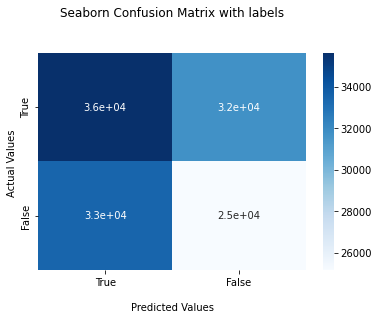

0.5290676091056234
0.5155479025886642


In [32]:
ax = sns.heatmap(cm_maha_mcd, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

## FP,FN,TP,TN
TP_maha_mcd = cm_maha_mcd[0][0]
FN_maha_mcd = cm_maha_mcd[1][0]
FP_maha_mcd = cm_maha_mcd[0][1]
TN_maha_mcd = cm_maha_mcd[1][1]

##Precision and Recall
Precision_maha_mcd = TP_maha_mcd/(TP_maha_mcd+FP_maha_mcd)
Recall_maha_mcd = TP_maha_mcd/(TP_maha_mcd+FN_maha_mcd)

print (Precision_maha_mcd)
print (Recall_maha_mcd)

### After Apply MCD, the  accuracy slightly increase. Precision is 69.15% and Recall is 61.42%

# Isolation Forest

In [33]:
#Isolation Forest
#from scipy.stats import uniform as sp_randFloat
# from scipy.stats import randint as sp_randInt

from sklearn.ensemble import IsolationForest
model_if = IsolationForest(random_state = 99)
#parameters = {'n_estimators' : sp_randInt(100, 1000),
#            'contamination' : sp_randFloat(0, 1),
#             }
parameters = {'n_estimators' : [100,150,200,250,300],
            'contamination' : np.linspace(0, 0.2, num = 10),
              #'bootstrap': [True, False]
             }
np.linspace(0, 0.3, num = 10)

array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ])

In [34]:
# def scorer_f(estimator, X):   #Scorer function for isolation forest
#       return np.mean(estimator.score_samples(one_hot_data_if))
from sklearn.metrics import make_scorer, f1_score
#Set normal to 0 and abnormal to 1 (binary)

one_hot_data_if = data_pca
one_hot_data_if.shape

(125973, 25)

In [35]:
# randomly sample
idx_rand = np.random.permutation(len(kdd_train_x))
num_sample = int(0.01*len(kdd_train_x))
one_hot_data_if_sample = one_hot_data_if.iloc[idx_rand[:num_sample]]
kdd_train_y_sample = kdd_train_y.iloc[idx_rand[:num_sample]]

In [36]:

f1sc = make_scorer(f1_score, average = 'micro')
randm_src = RandomizedSearchCV(estimator=model_if, param_distributions = parameters, cv = 3, scoring = f1sc, random_state = 0, return_train_score = True, n_jobs = -1)
model = randm_src.fit(one_hot_data_if_sample, kdd_train_y_sample["class_binary"])


C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\ensemble\_iforest.py", line 271, in fit
    raise ValueError(
ValueError: contamination must be in (0, 0.5], got: 0.000000

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\model_selectio

In [37]:
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 IsolationForest(contamination=0.044444444444444446, n_estimators=150,
                random_state=99)

 The best score across ALL searched params:
 0.4455904080009092

 The best parameters across ALL searched params:
 {'n_estimators': 150, 'contamination': 0.044444444444444446}


In [38]:
from sklearn.datasets import make_classification
XX_train, yy_train = make_classification(n_samples = 500, n_classes=2)
print(yy_train[:20])

rng = np.random.RandomState(42)
#Load the saved isolation Forest model
##model_if = joblib.load('IF.sav')
model_if = IsolationForest(n_estimators = 150, contamination = 0.044444444444444446, max_features=1.0)
model_if.fit(one_hot_data_if)
y_pred_if = model_if.predict(one_hot_data_if)
y_pred_if

[1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0]


C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.044444444444444446, n_estimators=150)

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
#Evaluation on training result
y_pred_if = np.where(y_pred_if == -1, 0, y_pred_if)

from sklearn.metrics import accuracy_score
train_acc_if = accuracy_score(kdd_train_y['class_binary'], y_pred_if)
print("Training accuracy: {:.4f}".format(train_acc_if))

Training accuracy: 0.4517


[[ 1932 65411]
 [ 3664 54966]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'True'), Text(1.5, 0, 'False')]

[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

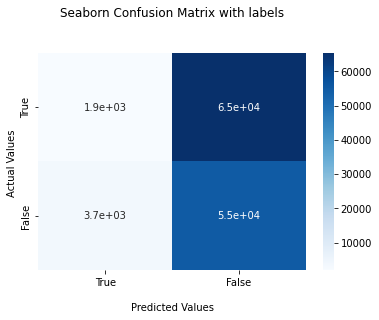

0.028688950596201534
0.34524660471765545


In [40]:
cm_if = confusion_matrix (kdd_train_y["class_binary"], y_pred_if)
print(cm_if)
ax = sns.heatmap(cm_if, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

## FP,FN,TP,TN
TP_if = cm_if[0][0]
FN_if = cm_if[1][0]
FP_if = cm_if[0][1]
TN_if = cm_if[1][1]

##Precision and Recall
Precision_if = TP_if/(TP_if+FP_if)
Recall_if = TP_if/(TP_if+FN_if)

print (Precision_if)
print (Recall_if)

### The result slightly improve from before without pca.
### Accuracy = 0.4259 --> 0.4485

# OCSVM

In [41]:
one_hot_data_svm = data_pca

#10% of data, 12597 out of 125973 is used for training.
one_hot_data_svm_ten_percent = one_hot_data_svm[0:12597]
kdd_train_y_ten_percent = kdd_train_y[0:12597]

from scipy.stats import uniform as sp_randFloat
    #Hyperparameter Tuning
from sklearn.svm import OneClassSVM
parameters_svm = {
             "nu" : sp_randFloat()
             }
model_svm = OneClassSVM()

In [42]:
def scorer_svm(estimator, X):   #Scorer function for OCSVM
      return np.mean(estimator.score_samples(one_hot_data_svm_ten_percent))
    
#Load the saved random_src result
randm_src_svm = joblib.load('OCSVMSearch.sav')

In [43]:
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src_svm.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src_svm.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src_svm.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 OneClassSVM(nu=0.5488135039273248)

 The best score across ALL searched params:
 nan

 The best parameters across ALL searched params:
 {'nu': 0.5488135039273248}


In [44]:
#Train model with ten percent of data
#Load the saved SVM model
svm = OneClassSVM(kernel = 'rbf', gamma = 'scale', nu=0.5488135039273248)
svm.fit(one_hot_data_svm_ten_percent)
y_pred_svm = svm.predict(one_hot_data_svm)


OneClassSVM(nu=0.5488135039273248)

In [45]:
one_hot_data_svm_ten_percent

,Variable 0,Variable 1,Variable 2,Variable 3,Variable 4,Variable 5,Variable 6,Variable 7,Variable 8,Variable 9,...,Variable 15,Variable 16,Variable 17,Variable 18,Variable 19,Variable 20,Variable 21,Variable 22,Variable 23,Variable 24
0,-0.271817,-0.031828,-0.007913,-0.057511,-0.242414,0.177059,-0.356125,0.408246,0.040124,0.127203,...,0.017673,-0.207699,-0.037677,-0.320516,0.282797,2.121937,-0.554458,-0.128769,-1.473139,-1.178282
1,0.172646,0.493701,0.004511,-0.797855,-0.794043,1.396155,-1.419620,1.811961,-0.912517,0.028640,...,0.001162,-0.341803,-0.086000,-0.390947,0.353699,2.470492,-0.970910,0.370601,1.229342,0.619450
2,1.415630,-0.666276,0.012028,-0.028398,-0.176458,-0.336946,0.050874,-0.047367,0.161117,0.009214,...,-0.013284,-0.080539,0.029774,0.017559,-0.007434,0.089605,0.323907,-0.208936,0.327632,-0.075673
3,-0.904705,-0.465462,-0.041510,0.310599,0.131188,-0.845985,0.027311,0.064317,0.051110,0.009947,...,0.013662,-0.103791,0.018487,-1.077262,0.095572,-1.068193,-0.187456,-0.311416,0.040898,-0.580725
4,-0.829569,-0.395406,-0.070325,0.588581,0.832244,-0.290600,-0.145860,0.193486,0.064853,-0.023984,...,-0.028782,-0.083731,0.048325,0.359113,-0.102098,-0.014897,0.542322,0.586904,0.417919,1.189537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12592,1.335048,-0.583419,0.029225,0.015845,-0.391473,-0.480954,-0.134968,0.211035,0.010141,0.020579,...,0.000281,-0.078191,-0.007173,0.057170,0.001752,0.527023,0.650973,-0.452801,0.214475,-0.426980
12593,1.405131,-0.670460,0.009711,-0.052636,-0.116800,-0.214474,0.093440,-0.124871,0.182308,0.002392,...,-0.021989,-0.086249,0.022578,0.009014,0.001257,0.009852,0.106797,-0.004894,0.162327,-0.032350
12594,-1.004226,-0.392154,-0.046524,0.346141,0.210340,-0.746812,-0.012722,0.112151,-0.006566,0.009871,...,0.015427,-0.066108,0.012999,-0.956241,0.101074,-0.795295,0.002573,-0.090638,-0.194525,-0.333834
12595,-0.928914,-0.411203,-0.072747,0.307538,0.355113,-0.583620,0.043376,0.108800,-0.105397,-0.096391,...,-0.034731,0.225357,0.064994,2.105253,-0.504560,-0.094137,0.153924,0.678438,0.815610,1.126338


In [46]:
#Evaluation on training result
y_pred_svm = np.where(y_pred_svm == -1, 0, y_pred_svm)

train_acc = accuracy_score(kdd_train_y['class_binary'], y_pred_svm)
print("Training accuracy: {:.4f}".format(train_acc))
cm_svm = confusion_matrix (kdd_train_y["class_binary"], y_pred_svm)
print(cm_svm)

Training accuracy: 0.5473
[[39592 27751]
 [29274 29356]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'True'), Text(1.5, 0, 'False')]

[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

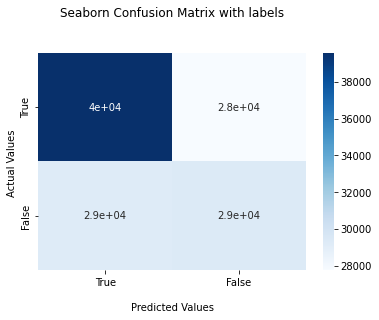

Precision:  0.5879155962757822
Recall 0.5749136003252694


In [47]:
ax = sns.heatmap(cm_svm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TP_svm = cm_svm[0][0]
FN_svm = cm_svm[1][0]
FP_svm = cm_svm[0][1]
TN_svm = cm_svm[1][1]


##Precision and Recall
Precision_svm = TP_svm/(TP_svm+FP_svm)
Recall_svm = TP_svm/(TP_svm+FN_svm)

print ("Precision: ",Precision_svm)
print ("Recall",Recall_svm)

# Comparison of Train Result

In [58]:
header_cmp = ['Algorithm','accuracy', 'recall', 'precision']
table_cmp = [['Mahalanobis', train_acc_maha, Recall_maha, Precision_maha],
             ['Maha + MCD', train_acc_maha_mcd, Recall_maha_mcd, Precision_maha_mcd],
             ['IF', train_acc_if, Recall_if, Precision_if],
             ['OCSVM', train_acc, Recall_svm, Precision_svm]]
comparison = pd.DataFrame(table_cmp,columns=header_cmp)

In [59]:
comparison

,Algorithm,accuracy,recall,precision
0,Mahalanobis,0.560120,0.550564,0.964465
1,Maha + MCD,0.482476,0.515548,0.529068
2,IF,0.451668,0.345247,0.028689
3,OCSVM,0.547324,0.574914,0.587916


### Accuracy Increase from 0.1468 --> 0.4153

# Testing